# Factors influence residential home prices across the USA - Supply

* importing the basic libraries required in this notebook

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import zscore
import missingno as msno
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Section 1 - View of data

In [30]:
# Import the data
df = pd.read_excel("Supply.xlsx")

In [31]:
df

,Date,Unemployment_construction,Hosuing_inventory_units,Saleprice_of_housesold,Construction_spending,Home_vacancy_rate,Housing_price
0,2003-04-01,9.3,121233,189500,425493,,130.884
1,2003-05-01,8.4,,195500,426270,,131.735
2,2003-06-01,7.9,,187900,436163,,132.649
...,...,...,...,...,...,...,...
237,2023-01-01,6.9,144287,432100,851235,,296.064
238,2023-02-01,6.6,,445700,851533,,296.926
239,2023-03-01,5.6,,455800,851460,,298.166


### * Lets, understand each column in the dataset

*Unemployment_construction: This column represents the unemployment rate specifically in the construction industry. It measures  the percentage of unemployed individuals among the total labor force in the construction sector. (Unit: Percentage)

*Housing_inventory_units: This column represents the number of housing inventory units. It indicates the quantity of available housing units in a particular market or area. (Unit: Count)

*Saleprice_of_housesold: This column represents the sale price of houses sold. It indicates the price at which residential properties are sold. (Unit: Currency - thousands of dollors)

*Construction_spending: This column represents the amount of spending on construction activities, specifically related to residential projects. It measures the total expenditure invested in constructing new residential properties or renovating existing ones. (Unit: Currency - millions of dollors)

*Home_vacancy_rate: This column represents the home vacancy rate. It measures the percentage of vacant homes in a particular area or market. (Unit: Percentage)

*Housing_price: This column represents the housing price. It indicates the average price of residential properties. (Unit: Index value)

In [32]:
df.shape

(240, 7)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       240 non-null    datetime64[ns]
 1   Unemployment_construction  240 non-null    float64       
 2   Hosuing_inventory_units    240 non-null    object        
 3   Saleprice_of_housesold     240 non-null    int64         
 4   Construction_spending      240 non-null    int64         
 5   Home_vacancy_rate          240 non-null    object        
 6   Housing_price              240 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 13.2+ KB


* We cant find null values, But there were null values in excel sheet

In [34]:
df1 = df.replace(' ', np.nan)

In [35]:
df1

,Date,Unemployment_construction,Hosuing_inventory_units,Saleprice_of_housesold,Construction_spending,Home_vacancy_rate,Housing_price
0,2003-04-01,9.3,121233.0,189500,425493,NaN,130.884
1,2003-05-01,8.4,NaN,195500,426270,NaN,131.735
2,2003-06-01,7.9,NaN,187900,436163,NaN,132.649
...,...,...,...,...,...,...,...
237,2023-01-01,6.9,144287.0,432100,851235,NaN,296.064
238,2023-02-01,6.6,NaN,445700,851533,NaN,296.926
239,2023-03-01,5.6,NaN,455800,851460,NaN,298.166


* Lets visualize the null values 

<AxesSubplot: >

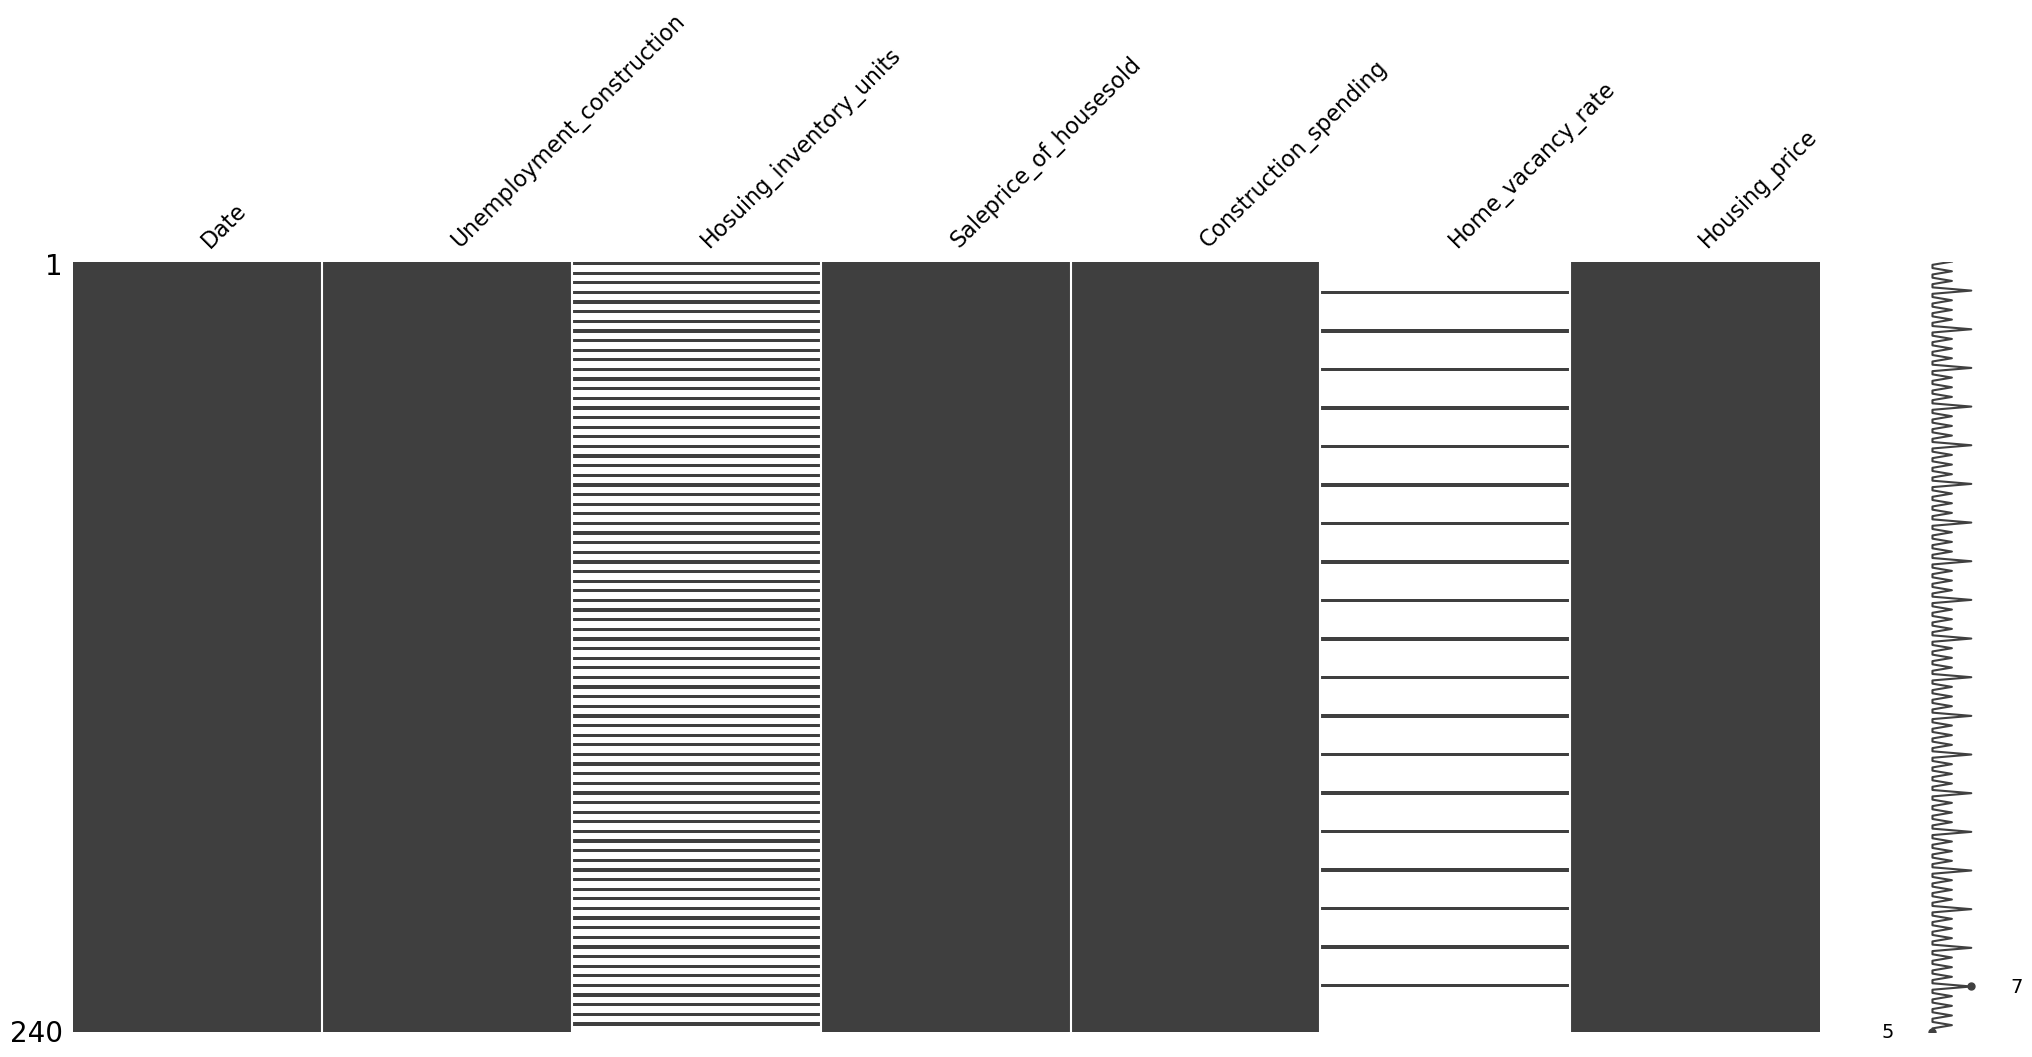

In [36]:
msno.matrix(df1)

# Section 2 - stat description

In [37]:
df1.describe()


,Unemployment_construction,Hosuing_inventory_units,Saleprice_of_housesold,Construction_spending,Home_vacancy_rate,Housing_price
count,240.000000,80.000000,240.000000,240.000000,19.000000,240.000000
mean,9.367083,133581.412500,281255.000000,495842.941667,1.884211,182.755325
std,5.009610,5919.740686,67786.830345,181021.579559,0.608517,42.833500
...,...,...,...,...,...,...
50%,7.700000,133321.000000,260650.000000,503623.500000,1.900000,173.481000
75%,11.450000,137990.750000,317400.000000,585371.750000,2.450000,200.137750
max,27.100000,144287.000000,496800.000000,954475.000000,2.800000,305.163000


KEY INFERENCE

*Home Vacancy Rate: The average home vacancy rate is 1.88%, with a minimum of 0.8% and a maximum of 2.8%. This indicates that     the housing market generally has a relatively low vacancy rate, suggesting a higher demand for housing units compared to the     available supply.

*Construction Spending: The average construction spending is $495,842.94, with a standard deviation of $181,021.58. This           indicates that there is a significant variation in the amount spent on construction projects, reflecting fluctuations in the     level of investment in residential real estate development.

*Housing Price: The average housing price is $182.76, with a minimum of $130.88 and a maximum of $305.16. This range shows that   there is variability in housing prices, with some properties priced relatively lower and others priced higher. It suggests  that  factors such as location, property type, and market conditions influence the pricing of houses sold.

# Section 3 - Pre Processing

In [38]:
pd.set_option("display.max_rows",6)
df1

,Date,Unemployment_construction,Hosuing_inventory_units,Saleprice_of_housesold,Construction_spending,Home_vacancy_rate,Housing_price
0,2003-04-01,9.3,121233.0,189500,425493,NaN,130.884
1,2003-05-01,8.4,NaN,195500,426270,NaN,131.735
2,2003-06-01,7.9,NaN,187900,436163,NaN,132.649
...,...,...,...,...,...,...,...
237,2023-01-01,6.9,144287.0,432100,851235,NaN,296.064
238,2023-02-01,6.6,NaN,445700,851533,NaN,296.926
239,2023-03-01,5.6,NaN,455800,851460,NaN,298.166


### 3.a. Null value treatment

* Fix null values, in three columns - Hosuing_inventory_units, Home_vacancy_rate

In [39]:
df1['Hosuing_inventory_units'] = df1['Hosuing_inventory_units'].fillna(method='ffill').fillna(method='bfill')

In [40]:
df1

,Date,Unemployment_construction,Hosuing_inventory_units,Saleprice_of_housesold,Construction_spending,Home_vacancy_rate,Housing_price
0,2003-04-01,9.3,121233.0,189500,425493,NaN,130.884
1,2003-05-01,8.4,121233.0,195500,426270,NaN,131.735
2,2003-06-01,7.9,121233.0,187900,436163,NaN,132.649
...,...,...,...,...,...,...,...
237,2023-01-01,6.9,144287.0,432100,851235,NaN,296.064
238,2023-02-01,6.6,144287.0,445700,851533,NaN,296.926
239,2023-03-01,5.6,144287.0,455800,851460,NaN,298.166


In [41]:
df1['Home_vacancy_rate'].interpolate(method='linear', inplace=True)
df1['Home_vacancy_rate'].ffill(inplace=True)

df1


,Date,Unemployment_construction,Hosuing_inventory_units,Saleprice_of_housesold,Construction_spending,Home_vacancy_rate,Housing_price
0,2003-04-01,9.3,121233.0,189500,425493,NaN,130.884
1,2003-05-01,8.4,121233.0,195500,426270,NaN,131.735
2,2003-06-01,7.9,121233.0,187900,436163,NaN,132.649
...,...,...,...,...,...,...,...
237,2023-01-01,6.9,144287.0,432100,851235,0.8,296.064
238,2023-02-01,6.6,144287.0,445700,851533,0.8,296.926
239,2023-03-01,5.6,144287.0,455800,851460,0.8,298.166


In [42]:
df1 = df1.drop(df.index[:9])

In [43]:
df1

,Date,Unemployment_construction,Hosuing_inventory_units,Saleprice_of_housesold,Construction_spending,Home_vacancy_rate,Housing_price
9,2004-01-01,11.3,122632.0,209500,503659,1.700000,141.646
10,2004-02-01,11.6,122632.0,219600,505081,1.716667,143.192
11,2004-03-01,11.3,122632.0,209600,511829,1.733333,145.058
...,...,...,...,...,...,...,...
237,2023-01-01,6.9,144287.0,432100,851235,0.800000,296.064
238,2023-02-01,6.6,144287.0,445700,851533,0.800000,296.926
239,2023-03-01,5.6,144287.0,455800,851460,0.800000,298.166


### 3.b. Outlier treatment

In [44]:
columns_to_check = ['Unemployment_construction','Hosuing_inventory_units','Saleprice_of_housesold','Construction_spending','Home_vacancy_rate']
df1[columns_to_check] = df1[columns_to_check].apply(pd.to_numeric, errors='coerce')
z_scores = np.abs(zscore(df1[columns_to_check]))
outlier_threshold = 3
outlier_rows = np.any(z_scores > outlier_threshold, axis=1)
outliers = df1[outlier_rows]

print(outliers)


          Date  Unemployment_construction  Hosuing_inventory_units  \
81  2010-01-01                       24.7                 131626.0   
82  2010-02-01                       27.1                 131626.0   
83  2010-03-01                       24.9                 131626.0   
234 2022-10-01                        4.1                 143950.0   

     Saleprice_of_housesold  Construction_spending  Home_vacancy_rate  \
81                   218200                 263680           2.600000   
82                   221900                 263649           2.591667   
83                   224800                 263220           2.583333   
234                  496800                 874105           0.800000   

     Housing_price  
81         147.395  
82         145.631  
83         145.859  
234        298.793  


# Section 4 - Exploratory data analysis

* Lets Answer the important question how Hosuing price index gets effected by other supply factors out there, For this we need to see the correlation

In [45]:
df1.drop('Date', axis=1, inplace=True)



In [46]:
for column in df1.columns:
    if column != 'Housing_price':
        # Calculate the correlation coefficient between the current column and Housing_price
        corr = df1[column].corr(df['Housing_price'])
        
        print(f"Correlation coefficient ({column} vs. Housing_price): {corr}")


Correlation coefficient (Unemployment_construction vs. Housing_price): -0.5877800199765547
Correlation coefficient (Hosuing_inventory_units vs. Housing_price): 0.7472598266956366
Correlation coefficient (Saleprice_of_housesold vs. Housing_price): 0.9341343904989842
Correlation coefficient (Construction_spending vs. Housing_price): 0.904220984581984
Correlation coefficient (Home_vacancy_rate vs. Housing_price): -0.7712716840699162


In [47]:
import plotly.express as px

for column in df1.columns:
    if column != 'Housing_price':
        # Create a scatter plot for the current column vs. Housing_price
        fig = px.scatter(df1, x=column, y='Housing_price', title=f"<b>{column} vs. Housing Price</b>")
        fig.show()


In [48]:
df1.columns

Index(['Unemployment_construction', 'Hosuing_inventory_units',
       'Saleprice_of_housesold', 'Construction_spending', 'Home_vacancy_rate',
       'Housing_price'],
      dtype='object')

# Section 5 - Scaling

In [49]:
from sklearn.preprocessing import StandardScaler

features = df1.drop('Housing_price', axis=1)
target = df1['Housing_price']  

scaler = StandardScaler()

scaled_features = scaler.fit_transform(features)

In [50]:
df1

,Unemployment_construction,Hosuing_inventory_units,Saleprice_of_housesold,Construction_spending,Home_vacancy_rate,Housing_price
9,11.3,122632.0,209500,503659,1.700000,141.646
10,11.6,122632.0,219600,505081,1.716667,143.192
11,11.3,122632.0,209600,511829,1.733333,145.058
...,...,...,...,...,...,...
237,6.9,144287.0,432100,851235,0.800000,296.064
238,6.6,144287.0,445700,851533,0.800000,296.926
239,5.6,144287.0,455800,851460,0.800000,298.166


# Section 5 - Model Building

* Lets go with linear regression since problem statement is regression 

In [51]:
X = df1.drop('Housing_price',axis=1)  
y = df1['Housing_price'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


n = X_test.shape[1]
N = len(X_test)
adj_r2 = 1 - (1 - r2) * (N - 1) / (N - n - 1)


print('Mean Squared Error:', mse)
print('R2-squared:', r2)
print('Adjusted R2-squared:', adj_r2)

Mean Squared Error: 33.24295470681893
R2-squared: 0.9771655299092303
Adjusted R2-squared: 0.9743808384347462


MODEL RESULT : The adjusted R2-squared value of 0.9743 indicates that approximately 97.43% of the variability in the house prices can be explained by the independent variables included in the linear regression model. This implies that the chosen independent variables have a strong influence on the predicted house prices.

In [52]:
residuals = y_test - y_pred

In [53]:
training_r2_score = model.score(X_train, y_train)

print('training_r2_score :',training_r2_score )

training_r2_score : 0.9816137395507585


* our traing score is perfect, it clearly states, there is no over fitting 

In [54]:
df = df.apply(pd.to_numeric, errors='coerce').dropna()

X = sm.add_constant(df[['Unemployment_construction', 'Hosuing_inventory_units','Saleprice_of_housesold', 'Construction_spending', 'Home_vacancy_rate']])
y = df['Housing_price']

model = sm.OLS(y, X)
results = model.fit()

summary = results.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:          Housing_price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     103.4
Date:                Tue, 04 Jul 2023   Prob (F-statistic):           5.35e-10
Time:                        11:42:44   Log-Likelihood:                -60.201
No. Observations:                  19   AIC:                             132.4
Df Residuals:                      13   BIC:                             138.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

C:\Users\nikhi\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=19



### Homoscedasticity

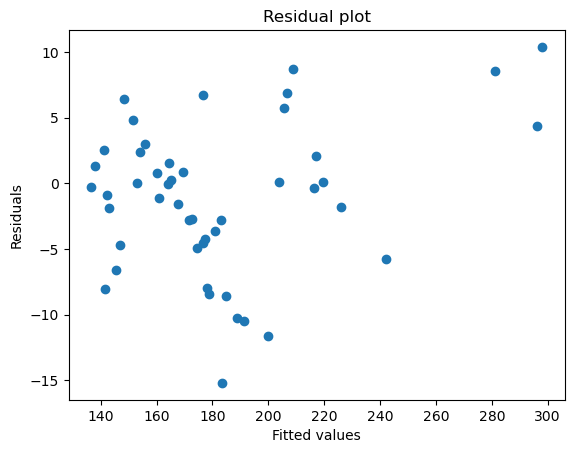

In [55]:
plt.scatter(y_test, residuals)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residual plot")
plt.show()

* we can clearly oberserve that, our data follows homoscedasticity

### Multicollinearity

In [59]:
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

                    Variable          VIF
0                      const  6146.433658
1  Unemployment_construction     2.562970
2    Hosuing_inventory_units    13.987227
3     Saleprice_of_housesold    27.003559
4      Construction_spending     9.583675
5          Home_vacancy_rate     3.327159


* Haha, unfortunately, our data as multicollinearity, this is very much common while dealing with home price predictions, This can be solved easily by dropping high VIF score featues or applying the ridge regression or PCA, it was just human tendancy for me to have as many features as possible thinking if i have more data, i can build a good model, We can easily deal with multicollinearity, while we solving the problem at micro level( individual analysis for each state or city)

### Normality 

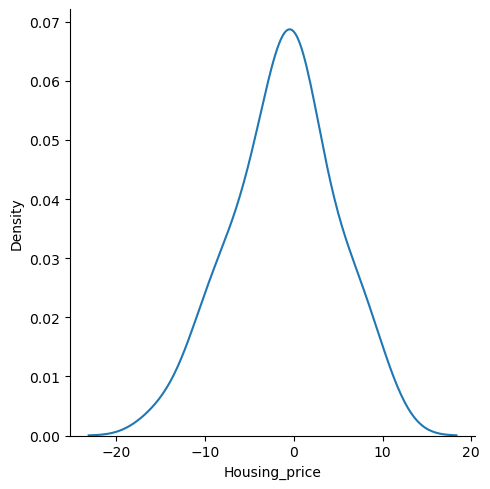

In [57]:
sns.displot(residuals,kind='kde')

* overall our data had normal distribution

# Influence of factors

1 - Unemployment_construction vs. Housing_price: The correlation coefficient of -0.5878 suggests a moderate negative correlation between unemployment in the construction industry and housing prices. This implies that as the unemployment rate in the construction sector increases, housing prices tend to decrease to some extent.

2 - Hosuing_inventory_units vs. Housing_price: The correlation coefficient of 0.7473 indicates a strong positive correlation between housing inventory units and housing prices. This suggests that as the number of housing inventory units increases, housing prices also tend to increase. It implies that limited housing supply can lead to higher prices.

3 - Saleprice_of_housesold vs. Housing_price: The correlation coefficient of 0.9341 represents a very strong positive correlation between the sale price of houses sold and housing prices. This suggests that as the sale prices of houses increase, housing prices also tend to increase significantly. It indicates a direct relationship between the sale prices of houses and the overall housing market.

4 - Construction_spending vs. Housing_price: The correlation coefficient of 0.9042 indicates a strong positive correlation between construction spending and housing prices. This implies that as construction spending increases, housing prices also tend to increase. It suggests that investment in construction activities contributes to the growth and appreciation of housing prices.

5 - Home_vacancy_rate vs. Housing_price: The correlation coefficient of -0.7713 represents a strong negative correlation between the home vacancy rate and housing prices. This implies that as the home vacancy rate increases, housing prices tend to decrease. It suggests that a high number of vacant homes can put downward pressure on housing prices.

# Thank You